
# Students Social Media Addiction



For this project we sourced our data from the following site:

https://www.kaggle.com/datasets

Surya Medepalli

Uyen Nguyen

### **Data Exploration & Preparation (Pandas)**




The first part of this project we will upload the data set which we will be exploring. Below is the python code which is used to upload the data set.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Students Social Media Addiction.csv to Students Social Media Addiction.csv


Using Pandas within python we load our data set.

In [ ]:
import pandas as pd
df = pd.read_csv("Students Social Media Addiction.csv")

Below we do a print check to see what type of data we have.

In [ ]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


With the code below, we clean our data set removing any null or n/a values, take away any whitespaces found in the data set, and finally normalize our data set.

In [ ]:
# 3) Cleaning & Type Fixes
df_clean = df.copy()

# Helper: safe numeric conversion
def to_numeric_safe(series):
    return pd.to_numeric(series, errors="coerce")

# Columns (from your dataset)
categorical_cols = [
    "Gender",
    "Academic_Level",
    "Country",
    "Most_Used_Platform",
    "Affects_Academic_Performance",
    "Relationship_Status",
]
numeric_cols = [
    "Age",
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Mental_Health_Score",
    "Conflicts_Over_Social_Media",
    "Addicted_Score",
]

# 3a) Strip whitespace from string-like columns that exist
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip()

# 3b) Normalize key text columns to consistent casing
if "Most_Used_Platform" in df_clean.columns:
    df_clean["Most_Used_Platform"] = df_clean["Most_Used_Platform"].str.title()

if "Relationship_Status" in df_clean.columns:
    df_clean["Relationship_Status"] = df_clean["Relationship_Status"].str.title()

if "Affects_Academic_Performance" in df_clean.columns:
    # Normalize common variants (yes/no, y/n, true/false)
    aap = df_clean["Affects_Academic_Performance"].str.lower().str.strip()
    mapping = {
        "yes": "Yes", "y": "Yes", "true": "Yes", "1": "Yes",
        "no": "No",  "n": "No",  "false": "No",  "0": "No"
    }
    df_clean["Affects_Academic_Performance"] = aap.map(mapping).fillna(df_clean["Affects_Academic_Performance"])

# 3c) Convert numeric columns robustly
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = to_numeric_safe(df_clean[col])

# 3d) (Optional) If Student_ID exists, ensure it’s integer-like
if "Student_ID" in df_clean.columns:
    df_clean["Student_ID"] = to_numeric_safe(df_clean["Student_ID"]).astype("Int64")

# 3e) Convert categorical columns to category dtype (saves memory, helps modeling later)
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype("category")

print("\n--- DTypes AFTER ---")
print(df_clean.dtypes)
print("\n--- Missing values AFTER ---")
print(df_clean.isnull().sum())


--- DTypes AFTER ---
Student_ID                         Int64
Age                                int64
Gender                          category
Academic_Level                  category
Country                         category
Avg_Daily_Usage_Hours            float64
Most_Used_Platform              category
Affects_Academic_Performance    category
Sleep_Hours_Per_Night            float64
Mental_Health_Score                int64
Relationship_Status             category
Conflicts_Over_Social_Media        int64
Addicted_Score                     int64
dtype: object

--- Missing values AFTER ---
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6,4)

# Quick peek
display(df_clean.head())

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,Tiktok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,Youtube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In the below section we perform a exploratory data analysis. We will visualize the data distributions, identify patterns, and formulate potential questions.

Distribution: Addiction score

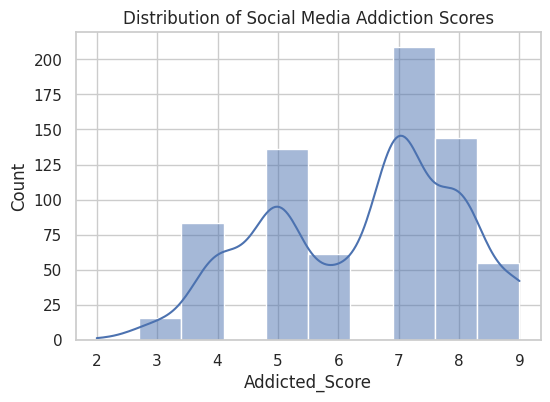

In [ ]:
plt.figure()
sns.histplot(df_clean["Addicted_Score"], bins=10, kde=True)
plt.title("Distribution of Social Media Addiction Scores")
plt.xlabel("Addicted_Score")
plt.ylabel("Count")
plt.show()

Distribution: Daily usage hours

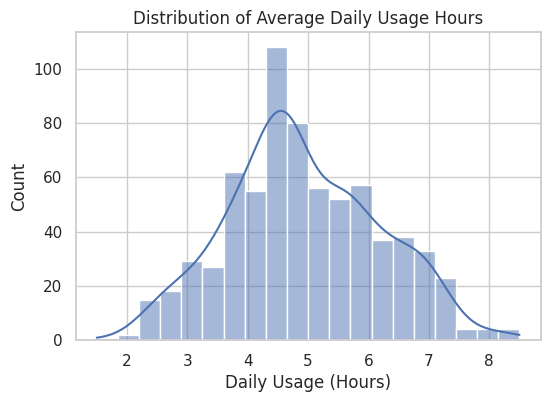

In [ ]:
plt.figure()
sns.histplot(df_clean["Avg_Daily_Usage_Hours"], bins=20, kde=True)
plt.title("Distribution of Average Daily Usage Hours")
plt.xlabel("Daily Usage (Hours)")
plt.ylabel("Count")
plt.show()

Categorical count: Most used platform

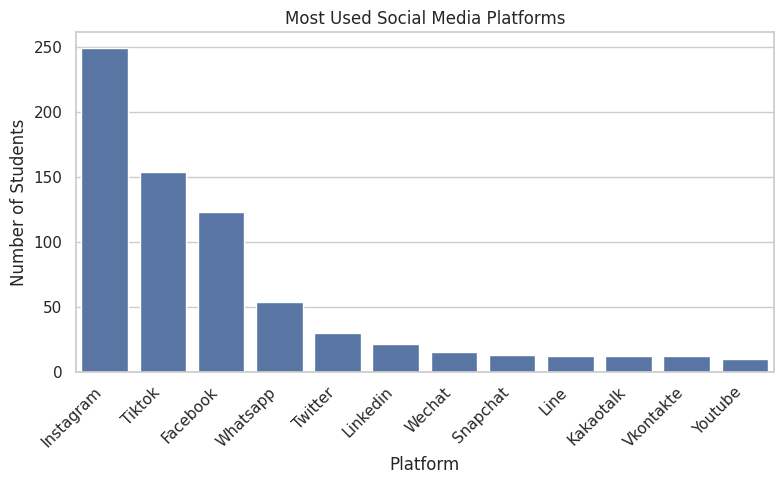

In [ ]:
plt.figure(figsize=(8,5))
order = df_clean["Most_Used_Platform"].value_counts().index
sns.countplot(data=df_clean, x="Most_Used_Platform", order=order)
plt.title("Most Used Social Media Platforms")
plt.xlabel("Platform")
plt.ylabel("Number of Students")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Addiction score by gender (boxplot)

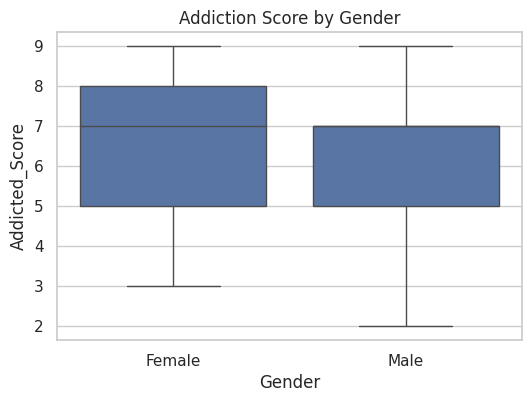

In [ ]:
plt.figure()
sns.boxplot(data=df_clean, x="Gender", y="Addicted_Score")
plt.title("Addiction Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Addicted_Score")
plt.show()


Installing mrjob.

In [ ]:
!pip -q install mrjob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 5.8 MB/s eta 0:00:00


Avg Addiction by Platform

Question: Which platforms are associated with higher average addiction scores?

In [ ]:
%%writefile mrjob_avg_addiction_by_platform.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import csv
import sys

class AvgAddictionByPlatform(MRJob):
    # Make sure we read CSV rows safely
    def mapper(self, _, line):
        # Skip header by detecting column name in first line
        if line.lower().startswith("student_id,") or line.lower().startswith('"student_id",'):
            return

        # Robust CSV parsing
        try:
            row = next(csv.reader([line]))
        except Exception:
            return

        # Column indices based on your file:
        # ['Student_ID','Age','Gender','Academic_Level','Country',
        #  'Avg_Daily_Usage_Hours','Most_Used_Platform','Affects_Academic_Performance',
        #  'Sleep_Hours_Per_Night','Mental_Health_Score','Relationship_Status',
        #  'Conflicts_Over_Social_Media','Addicted_Score']
        try:
            platform = row[6].strip().title()
            addicted_score = row[12].strip()
            if platform and addicted_score != "":
                addicted_score = float(addicted_score)
                yield platform, (addicted_score, 1)
        except Exception:
            pass

    def reducer(self, platform, values):
        total = 0.0
        count = 0
        for s, c in values:
            total += s
            count += c
        if count > 0:
            yield platform, round(total / count, 3)

    # Optional: sort results descending by average
    def steps(self):
        return [
            MRStep(mapper=self.mapper, reducer=self.reducer),
        ]

if __name__ == "__main__":
    AvgAddictionByPlatform.run()

Writing mrjob_avg_addiction_by_platform.py


In [ ]:
!python mrjob_avg_addiction_by_platform.py "Students Social Media Addiction.csv" -r inline

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/mrjob_avg_addiction_by_platform.root.20250903.082759.046138
Running step 1 of 1...
job output is in /tmp/mrjob_avg_addiction_by_platform.root.20250903.082759.046138/output
Streaming final output from /tmp/mrjob_avg_addiction_by_platform.root.20250903.082759.046138/output...
"Facebook"	5.667
"Instagram"	6.554
"Twitter"	5.5
"Vkontakte"	5.0
"Wechat"	6.067
"Whatsapp"	7.463
"Youtube"	6.1
"Kakaotalk"	6.0
"Line"	3.0
"Linkedin"	3.81
"Snapchat"	7.462
"Tiktok"	7.429
Removing temp directory /tmp/mrjob_avg_addiction_by_platform.root.20250903.082759.046138...


Usage vs Mental Health

Question: Is there a linear relationship between daily usage hours and mental health scores?

In [ ]:
%%writefile mrjob_usage_vs_mentalhealth_corr.py
from mrjob.job import MRJob
import csv

class UsageMentalHealthCorrelation(MRJob):
    def mapper(self, _, line):
        if line.lower().startswith("student_id,") or line.lower().startswith('"student_id",'):
            return
        try:
            row = next(csv.reader([line]))
        except Exception:
            return

        try:
            x = float(row[5])   # Avg_Daily_Usage_Hours
            y = float(row[9])   # Mental_Health_Score
            # Emit a single key "stats" with the sufficient statistics
            yield "stats", (1, x, y, x*x, y*y, x*y)
        except Exception:
            pass

    def reducer(self, key, values):
        n = sx = sy = sxx = syy = sxy = 0.0
        for c, x, y, x2, y2, xy in values:
            n += c
            sx += x
            sy += y
            sxx += x2
            syy += y2
            sxy += xy

        # Compute Pearson r
        # r = [n*Σxy - (Σx)(Σy)] / sqrt([n*Σx2 - (Σx)^2] * [n*Σy2 - (Σy)^2])
        num = n * sxy - sx * sy
        den_x = n * sxx - sx * sx
        den_y = n * syy - sy * sy

        if den_x <= 0 or den_y <= 0:
            yield "pearson_r", None
        else:
            r = num / ((den_x * den_y) ** 0.5)
            yield "pearson_r", round(r, 4)

if __name__ == "__main__":
    UsageMentalHealthCorrelation.run()


Writing mrjob_usage_vs_mentalhealth_corr.py


In [ ]:
!python mrjob_usage_vs_mentalhealth_corr.py "Students Social Media Addiction.csv" -r inline

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/mrjob_usage_vs_mentalhealth_corr.root.20250903.082805.636176
Running step 1 of 1...
job output is in /tmp/mrjob_usage_vs_mentalhealth_corr.root.20250903.082805.636176/output
Streaming final output from /tmp/mrjob_usage_vs_mentalhealth_corr.root.20250903.082805.636176/output...
"pearson_r"	-0.8011
Removing temp directory /tmp/mrjob_usage_vs_mentalhealth_corr.root.20250903.082805.636176...


### **Spark** RDDs

In [ ]:
!pip -q install pyspark==3.5.2

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SocialMediaAddiction").getOrCreate()
sc = spark.sparkContext

print("Spark version:", spark.version)
print("Master:", sc.master)

Spark version: 3.5.2
Master: local[*]


In [ ]:
from google.colab import files
import io, pandas as pd

uploaded = files.upload()
FNAME = next(iter(uploaded.keys()))
print("Uploaded:", FNAME)

Saving Students Social Media Addiction.csv to Students Social Media Addiction (2).csv
Uploaded: Students Social Media Addiction (2).csv


In [ ]:
# Each element is a raw line (string)
raw_rdd = sc.textFile(FNAME)
print("Raw RDD partitions:", raw_rdd.getNumPartitions())
print("First 2 lines:\n", "\n".join(raw_rdd.take(2)))

Raw RDD partitions: 2
First 2 lines:
 Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8


In [ ]:
import csv

def parse_csv_partition(lines_iter):
    # csv.reader handles commas/quotes correctly
    reader = csv.reader(lines_iter)
    for row in reader:
        yield row

rows_rdd = raw_rdd.mapPartitions(parse_csv_partition)

# Remove header safely (wherever it appears)
def is_header(row):
    return len(row) > 0 and str(row[0]).strip().lower() == "student_id"

data_rows_rdd = rows_rdd.filter(lambda r: not is_header(r))

print("Total records (excluding header):", data_rows_rdd.count())
print("Sample rows:", data_rows_rdd.take(2))

Total records (excluding header): 705
Sample rows: [['1', '19', 'Female', 'Undergraduate', 'Bangladesh', '5.2', 'Instagram', 'Yes', '6.5', '6', 'In Relationship', '3', '8'], ['2', '22', 'Male', 'Graduate', 'India', '2.1', 'Twitter', 'No', '7.5', '8', 'Single', '0', '3']]


In [ ]:
def to_int(x):
    try:
        # guard against floats stored as "19.0"
        return int(float(x))
    except:
        return None

def to_float(x):
    try:
        return float(x)
    except:
        return None

COLS = [
    'Student_ID','Age','Gender','Academic_Level','Country',
    'Avg_Daily_Usage_Hours','Most_Used_Platform','Affects_Academic_Performance',
    'Sleep_Hours_Per_Night','Mental_Health_Score','Relationship_Status',
    'Conflicts_Over_Social_Media','Addicted_Score'
]

def row_to_typed_dict(row):
    # Be defensive about row length
    if len(row) < 13:
        return None

    return {
        'Student_ID': to_int(row[0]),
        'Age': to_int(row[1]),
        'Gender': (row[2] or "").strip(),
        'Academic_Level': (row[3] or "").strip(),
        'Country': (row[4] or "").strip(),
        'Avg_Daily_Usage_Hours': to_float(row[5]),
        'Most_Used_Platform': (row[6] or "").strip().title(),
        'Affects_Academic_Performance': (row[7] or "").strip().title(),  # Yes/No
        'Sleep_Hours_Per_Night': to_float(row[8]),
        'Mental_Health_Score': to_float(row[9]),
        'Relationship_Status': (row[10] or "").strip().title(),
        'Conflicts_Over_Social_Media': to_float(row[11]),
        'Addicted_Score': to_float(row[12]),
    }

typed_rdd = data_rows_rdd.map(row_to_typed_dict).filter(lambda d: d is not None)
typed_rdd.persist()

print("Typed RDD count:", typed_rdd.count())
typed_rdd.take(3)

Typed RDD count: 705


[{'Student_ID': 1,
  'Age': 19,
  'Gender': 'Female',
  'Academic_Level': 'Undergraduate',
  'Country': 'Bangladesh',
  'Avg_Daily_Usage_Hours': 5.2,
  'Most_Used_Platform': 'Instagram',
  'Affects_Academic_Performance': 'Yes',
  'Sleep_Hours_Per_Night': 6.5,
  'Mental_Health_Score': 6.0,
  'Relationship_Status': 'In Relationship',
  'Conflicts_Over_Social_Media': 3.0,
  'Addicted_Score': 8.0},
 {'Student_ID': 2,
  'Age': 22,
  'Gender': 'Male',
  'Academic_Level': 'Graduate',
  'Country': 'India',
  'Avg_Daily_Usage_Hours': 2.1,
  'Most_Used_Platform': 'Twitter',
  'Affects_Academic_Performance': 'No',
  'Sleep_Hours_Per_Night': 7.5,
  'Mental_Health_Score': 8.0,
  'Relationship_Status': 'Single',
  'Conflicts_Over_Social_Media': 0.0,
  'Addicted_Score': 3.0},
 {'Student_ID': 3,
  'Age': 20,
  'Gender': 'Female',
  'Academic_Level': 'Undergraduate',
  'Country': 'USA',
  'Avg_Daily_Usage_Hours': 6.0,
  'Most_Used_Platform': 'Tiktok',
  'Affects_Academic_Performance': 'Yes',
  'Sleep_H

FILTER: high-risk students who also report academic impact

In [ ]:
def to_int(x):
    try:
        # guard against floats stored as "19.0"
        return int(float(x))
    except:
        return None

def to_float(x):
    try:
        return float(x)
    except:
        return None

COLS = [
    'Student_ID','Age','Gender','Academic_Level','Country',
    'Avg_Daily_Usage_Hours','Most_Used_Platform','Affects_Academic_Performance',
    'Sleep_Hours_Per_Night','Mental_Health_Score','Relationship_Status',
    'Conflicts_Over_Social_Media','Addicted_Score'
]

def row_to_typed_dict(row):
    # Be defensive about row length
    if len(row) < 13:
        return None

    return {
        'Student_ID': to_int(row[0]),
        'Age': to_int(row[1]),
        'Gender': (row[2] or "").strip(),
        'Academic_Level': (row[3] or "").strip(),
        'Country': (row[4] or "").strip(),
        'Avg_Daily_Usage_Hours': to_float(row[5]),
        'Most_Used_Platform': (row[6] or "").strip().title(),
        'Affects_Academic_Performance': (row[7] or "").strip().title(),  # Yes/No
        'Sleep_Hours_Per_Night': to_float(row[8]),
        'Mental_Health_Score': to_float(row[9]),
        'Relationship_Status': (row[10] or "").strip().title(),
        'Conflicts_Over_Social_Media': to_float(row[11]),
        'Addicted_Score': to_float(row[12]),
    }

typed_rdd = data_rows_rdd.map(row_to_typed_dict).filter(lambda d: d is not None)
typed_rdd.persist()

print("Typed RDD count:", typed_rdd.count())
typed_rdd.take(3)

Typed RDD count: 705


[{'Student_ID': 1,
  'Age': 19,
  'Gender': 'Female',
  'Academic_Level': 'Undergraduate',
  'Country': 'Bangladesh',
  'Avg_Daily_Usage_Hours': 5.2,
  'Most_Used_Platform': 'Instagram',
  'Affects_Academic_Performance': 'Yes',
  'Sleep_Hours_Per_Night': 6.5,
  'Mental_Health_Score': 6.0,
  'Relationship_Status': 'In Relationship',
  'Conflicts_Over_Social_Media': 3.0,
  'Addicted_Score': 8.0},
 {'Student_ID': 2,
  'Age': 22,
  'Gender': 'Male',
  'Academic_Level': 'Graduate',
  'Country': 'India',
  'Avg_Daily_Usage_Hours': 2.1,
  'Most_Used_Platform': 'Twitter',
  'Affects_Academic_Performance': 'No',
  'Sleep_Hours_Per_Night': 7.5,
  'Mental_Health_Score': 8.0,
  'Relationship_Status': 'Single',
  'Conflicts_Over_Social_Media': 0.0,
  'Addicted_Score': 3.0},
 {'Student_ID': 3,
  'Age': 20,
  'Gender': 'Female',
  'Academic_Level': 'Undergraduate',
  'Country': 'USA',
  'Avg_Daily_Usage_Hours': 6.0,
  'Most_Used_Platform': 'Tiktok',
  'Affects_Academic_Performance': 'Yes',
  'Sleep_H

In [ ]:
# Ensure typed_rdd is available
try:
    typed_rdd
except NameError as e:
    raise RuntimeError("Please run the 'Load the data into Spark RDDs' cells first to create `typed_rdd`.") from e

MAP: derive features

Usage_to_Sleep_Ratio = hours of social media per hour of sleep

Risk_Bucket based on Addicted_Score (Low: 0–3, Medium: 4–6, High: 7–10)

In [ ]:
def derive_features(d):
    usage = d.get('Avg_Daily_Usage_Hours')
    sleep = d.get('Sleep_Hours_Per_Night')
    score = d.get('Addicted_Score')

    ratio = None
    if usage is not None and sleep is not None and sleep > 0:
        ratio = usage / sleep

    if score is None:
        risk = None
    elif score <= 3:
        risk = "Low"
    elif score <= 6:
        risk = "Medium"
    else:
        risk = "High"

    d2 = d.copy()
    d2['Usage_to_Sleep_Ratio'] = ratio
    d2['Risk_Bucket'] = risk
    return d2

mapped_rdd = typed_rdd.map(derive_features)

# ACTION 1: take() — show a few enriched records
mapped_examples = mapped_rdd.take(5)
for i, rec in enumerate(mapped_examples, 1):
    print(f"{i}. Student_ID={rec['Student_ID']}, Platform={rec['Most_Used_Platform']}, "
          f"Score={rec['Addicted_Score']}, Ratio={rec['Usage_to_Sleep_Ratio']}, Risk={rec['Risk_Bucket']}")

1. Student_ID=1, Platform=Instagram, Score=8.0, Ratio=0.8, Risk=High
2. Student_ID=2, Platform=Twitter, Score=3.0, Ratio=0.28, Risk=Low
3. Student_ID=3, Platform=Tiktok, Score=9.0, Ratio=1.2, Risk=High
4. Student_ID=4, Platform=Youtube, Score=4.0, Ratio=0.42857142857142855, Risk=Medium
5. Student_ID=5, Platform=Facebook, Score=7.0, Ratio=0.75, Risk=High


high-risk students who also report academic impact

In [ ]:
high_risk_impacted_rdd = mapped_rdd.filter(
    lambda d: d.get('Risk_Bucket') == 'High' and d.get('Affects_Academic_Performance') == 'Yes'
)

# ACTION 2: count() — how many match the condition?
n_high_risk_impacted = high_risk_impacted_rdd.count()
print("High-risk & academic-impact count:", n_high_risk_impacted)

# ACTION 3: take() — show a few examples
for rec in high_risk_impacted_rdd.take(5):
    print(f"Student_ID={rec['Student_ID']}, Platform={rec['Most_Used_Platform']}, "
          f"Score={rec['Addicted_Score']}, Affects_Academics={rec['Affects_Academic_Performance']}")

High-risk & academic-impact count: 408
Student_ID=1, Platform=Instagram, Score=8.0, Affects_Academics=Yes
Student_ID=3, Platform=Tiktok, Score=9.0, Affects_Academics=Yes
Student_ID=5, Platform=Facebook, Score=7.0, Affects_Academics=Yes
Student_ID=6, Platform=Instagram, Score=9.0, Affects_Academics=Yes
Student_ID=8, Platform=Snapchat, Score=8.0, Affects_Academics=Yes


JOIN — attach per-platform average addiction to each student, compute deviation

Compute avg Addicted_Score per platform

Join with each student’s record on Most_Used_Platform

Compute Delta = Student_Score − Platform_Avg

In [ ]:
# 3.1 Build (platform -> (sum_score, count)) then (platform -> avg)
sumcount_by_platform = (
    typed_rdd
    .map(lambda d: (d['Most_Used_Platform'], (d['Addicted_Score'], 1)))
    .filter(lambda kv: kv[0] is not None and kv[1][0] is not None)
    .reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1]))
)

avg_by_platform = sumcount_by_platform.mapValues(lambda sc: sc[0] / sc[1])

# ACTION 4: collect() — small RDD, safe to bring to driver and print sorted
avg_platform_list = sorted(avg_by_platform.collect(), key=lambda x: x[1], reverse=True)
print("Average Addicted_Score by Platform:")
for p, avg in avg_platform_list:
    print(f"  {p:15s} {avg:.3f}")

# 3.2 Prepare students keyed by platform: (platform -> (Student_ID, Student_Score))
students_by_platform = (
    typed_rdd
    .map(lambda d: (d['Most_Used_Platform'], (d['Student_ID'], d['Addicted_Score'])))
    .filter(lambda kv: kv[0] is not None and kv[1][0] is not None and kv[1][1] is not None)
)

# 3.3 JOIN: (platform -> ((Student_ID, Student_Score), Platform_Avg))
joined = students_by_platform.join(avg_by_platform)

# 3.4 Compute deviation per student
deviation = joined.map(lambda kv: {
    'Platform': kv[0],
    'Student_ID': kv[1][0][0],
    'Student_Score': kv[1][0][1],
    'Platform_Avg': kv[1][1],
    'Delta': kv[1][0][1] - kv[1][1]
})

# Show a few joined results
print("\nJoined sample (student vs platform average):")
for rec in deviation.take(10):
    print(rec)

Average Addicted_Score by Platform:
  Whatsapp        7.463
  Snapchat        7.462
  Tiktok          7.429
  Instagram       6.554
  Youtube         6.100
  Wechat          6.067
  Kakaotalk       6.000
  Facebook        5.667
  Twitter         5.500
  Vkontakte       5.000
  Linkedin        3.810
  Line            3.000

Joined sample (student vs platform average):
{'Platform': 'Instagram', 'Student_ID': 1, 'Student_Score': 8.0, 'Platform_Avg': 6.554216867469879, 'Delta': 1.4457831325301207}
{'Platform': 'Instagram', 'Student_ID': 6, 'Student_Score': 9.0, 'Platform_Avg': 6.554216867469879, 'Delta': 2.4457831325301207}
{'Platform': 'Instagram', 'Student_ID': 10, 'Student_Score': 4.0, 'Platform_Avg': 6.554216867469879, 'Delta': -2.5542168674698793}
{'Platform': 'Instagram', 'Student_ID': 14, 'Student_Score': 9.0, 'Platform_Avg': 6.554216867469879, 'Delta': 2.4457831325301207}
{'Platform': 'Instagram', 'Student_ID': 18, 'Student_Score': 8.0, 'Platform_Avg': 6.554216867469879, 'Delta': 1

### **Spark DataFrames**

Install and start spark

In [ ]:
!pip -q install pyspark==3.5.2

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SocialMediaAddiction-DF").getOrCreate()
print("Spark version:", spark.version)

Spark version: 3.5.2


Upload student social media addiction csv file

In [ ]:
from google.colab import files
import io, pandas as pd

uploaded = files.upload()
FNAME = next(iter(uploaded.keys()))
print("Uploaded:", FNAME)

Saving Students Social Media Addiction.csv to Students Social Media Addiction (3).csv
Uploaded: Students Social Media Addiction (3).csv


In [ ]:
# --- Bootstrap: make sure Spark is running and df/df_clean exist ---

# 1) Spark session
try:
    spark
except NameError:
    !pip -q install pyspark==3.5.1
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.appName("SocialMediaAddiction-DF").getOrCreate()

from pyspark.sql import functions as F, types as T
import os, glob

# 2) Find or upload the CSV
CANDIDATES = [
    "Students Social Media Addiction.csv",
    "Students_Social_Media_Addiction.csv",
]

FNAME = next((p for p in CANDIDATES if os.path.exists(p)), None)
if FNAME is None:
    matches = glob.glob("*.csv")
    if matches:
        FNAME = matches[0]
    else:
        try:
            from google.colab import files, io
            uploaded = files.upload()  # pick your CSV if prompted
            FNAME = next(iter(uploaded.keys()))
        except Exception as e:
            raise RuntimeError("Could not locate CSV. Please upload your file.") from e

print("Using CSV:", FNAME)

# 3) Explicit schema (robust & consistent)
schema = T.StructType([
    T.StructField("Student_ID", T.IntegerType(), True),
    T.StructField("Age", T.IntegerType(), True),
    T.StructField("Gender", T.StringType(), True),
    T.StructField("Academic_Level", T.StringType(), True),
    T.StructField("Country", T.StringType(), True),
    T.StructField("Avg_Daily_Usage_Hours", T.DoubleType(), True),
    T.StructField("Most_Used_Platform", T.StringType(), True),
    T.StructField("Affects_Academic_Performance", T.StringType(), True),
    T.StructField("Sleep_Hours_Per_Night", T.DoubleType(), True),
    T.StructField("Mental_Health_Score", T.DoubleType(), True),
    T.StructField("Relationship_Status", T.StringType(), True),
    T.StructField("Conflicts_Over_Social_Media", T.DoubleType(), True),
    T.StructField("Addicted_Score", T.IntegerType(), True),
])

df = spark.read.csv(FNAME, header=True, schema=schema)

# 4) Light normalization → df_clean
df_clean = (
    df
    .withColumn("Most_Used_Platform", F.initcap(F.trim(F.col("Most_Used_Platform"))))
    .withColumn("Relationship_Status", F.initcap(F.trim(F.col("Relationship_Status"))))
    .withColumn(
        "Affects_Academic_Performance",
        F.when(F.lower(F.trim(F.col("Affects_Academic_Performance"))).isin("yes","y","true","1"), "Yes")
         .when(F.lower(F.trim(F.col("Affects_Academic_Performance"))).isin("no","n","false","0"), "No")
         .otherwise(F.col("Affects_Academic_Performance"))
    )
)

# 5) Register a SQL temp view
df_clean.createOrReplaceTempView("students")

# 6) Verify
df_clean.printSchema()
df_clean.show(5, truncate=False)

Using CSV: Students Social Media Addiction.csv
root
 |-- Student_ID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Academic_Level: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Avg_Daily_Usage_Hours: double (nullable = true)
 |-- Most_Used_Platform: string (nullable = true)
 |-- Affects_Academic_Performance: string (nullable = true)
 |-- Sleep_Hours_Per_Night: double (nullable = true)
 |-- Mental_Health_Score: double (nullable = true)
 |-- Relationship_Status: string (nullable = true)
 |-- Conflicts_Over_Social_Media: double (nullable = true)
 |-- Addicted_Score: integer (nullable = true)

+----------+---+------+--------------+----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|Student_ID|Age|Gender|Academic_Level|Country   |Avg_Daily_Usage_Hours|Most_Used_Platform|Affect

Selection: choose specific columns

In [ ]:
from pyspark.sql import functions as F

# Use df_clean if available, else fall back to df
try:
    df_clean
except NameError:
    df_clean = df

# Light, DF-only normalization (idempotent)
df_clean = (
    df_clean
    .withColumn("Most_Used_Platform", F.initcap(F.trim(F.col("Most_Used_Platform"))))
    .withColumn("Relationship_Status", F.initcap(F.trim(F.col("Relationship_Status"))))
    .withColumn(
        "Affects_Academic_Performance",
        F.when(F.lower(F.trim(F.col("Affects_Academic_Performance"))).isin("yes","y","true","1"), "Yes")
         .when(F.lower(F.trim(F.col("Affects_Academic_Performance"))).isin("no","n","false","0"), "No")
         .otherwise(F.col("Affects_Academic_Performance"))
    )
)

# Quick action
df_clean.show(5, truncate=False)

+----------+---+------+--------------+----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|Student_ID|Age|Gender|Academic_Level|Country   |Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|Mental_Health_Score|Relationship_Status|Conflicts_Over_Social_Media|Addicted_Score|
+----------+---+------+--------------+----------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|1         |19 |Female|Undergraduate |Bangladesh|5.2                  |Instagram         |Yes                         |6.5                  |6.0                |In Relationship    |3.0                        |8             |
|2         |22 |Male  |Graduate      |India     |2.1                  |Twitter           |No        

In [ ]:
selected = df_clean.select(
    "Student_ID",
    "Most_Used_Platform",
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Mental_Health_Score",
    "Addicted_Score",
    "Affects_Academic_Performance"
)

# ACTION: show()
selected.show(10, truncate=False)

+----------+------------------+---------------------+---------------------+-------------------+--------------+----------------------------+
|Student_ID|Most_Used_Platform|Avg_Daily_Usage_Hours|Sleep_Hours_Per_Night|Mental_Health_Score|Addicted_Score|Affects_Academic_Performance|
+----------+------------------+---------------------+---------------------+-------------------+--------------+----------------------------+
|1         |Instagram         |5.2                  |6.5                  |6.0                |8             |Yes                         |
|2         |Twitter           |2.1                  |7.5                  |8.0                |3             |No                          |
|3         |Tiktok            |6.0                  |5.0                  |5.0                |9             |Yes                         |
|4         |Youtube           |3.0                  |7.0                  |7.0                |4             |No                          |
|5         |Facebook

Filter: rows based on conditions

We will look at students who use ≥ 4 hours/day and report academic impact = “Yes”

In [ ]:
filtered = selected.where(
    (F.col("Avg_Daily_Usage_Hours") >= 4) &
    (F.col("Affects_Academic_Performance") == "Yes")
)

# ACTION: count() + show()
print("Filtered count:", filtered.count())
filtered.select("Student_ID","Most_Used_Platform","Avg_Daily_Usage_Hours","Addicted_Score").show(10, truncate=False)

Filtered count: 432
+----------+------------------+---------------------+--------------+
|Student_ID|Most_Used_Platform|Avg_Daily_Usage_Hours|Addicted_Score|
+----------+------------------+---------------------+--------------+
|1         |Instagram         |5.2                  |8             |
|3         |Tiktok            |6.0                  |9             |
|5         |Facebook          |4.5                  |7             |
|6         |Instagram         |7.2                  |9             |
|8         |Snapchat          |5.8                  |8             |
|11        |Snapchat          |4.8                  |7             |
|12        |Tiktok            |5.5                  |8             |
|14        |Instagram         |6.5                  |9             |
|16        |Tiktok            |4.2                  |7             |
|18        |Instagram         |5.0                  |8             |
+----------+------------------+---------------------+--------------+
only showing t

Grouping & Aggregation: per-platform summaries

In [ ]:
platform_agg = (
    df_clean
    .groupBy("Most_Used_Platform")
    .agg(
        F.count("*").alias("n"),
        F.round(F.avg("Addicted_Score"), 3).alias("avg_addicted"),
        F.round(F.avg("Avg_Daily_Usage_Hours"), 2).alias("avg_usage"),
        F.round(F.avg("Mental_Health_Score"), 2).alias("avg_mental"),
        F.round(F.stddev_samp("Addicted_Score"), 3).alias("sd_addicted")
    )
    .orderBy(F.desc("avg_addicted"))
)

# ACTION: show()
platform_agg.show(20, truncate=False)

+------------------+---+------------+---------+----------+-----------+
|Most_Used_Platform|n  |avg_addicted|avg_usage|avg_mental|sd_addicted|
+------------------+---+------------+---------+----------+-----------+
|Whatsapp          |54 |7.463       |6.48     |5.54      |0.503      |
|Snapchat          |13 |7.462       |5.09     |5.54      |0.776      |
|Tiktok            |154|7.429       |5.35     |5.71      |1.041      |
|Instagram         |249|6.554       |4.87     |6.12      |1.537      |
|Youtube           |10 |6.1         |4.08     |6.6       |1.37       |
|Wechat            |15 |6.067       |4.96     |6.47      |1.033      |
|Kakaotalk         |12 |6.0         |4.73     |6.0       |0.0        |
|Facebook          |123|5.667       |4.51     |6.72      |1.435      |
|Twitter           |30 |5.5         |4.87     |6.83      |1.548      |
|Vkontakte         |12 |5.0         |4.25     |7.0       |0.0        |
|Linkedin          |21 |3.81        |2.52     |8.0       |0.602      |
|Line 

SQL Queries: register a view and query with Spark SQL

In [ ]:
df_clean.createOrReplaceTempView("students")

top_platforms_sql = spark.sql("""
SELECT
  Most_Used_Platform,
  COUNT(*) AS n,
  ROUND(AVG(Addicted_Score), 3) AS avg_addicted,
  ROUND(AVG(Avg_Daily_Usage_Hours), 2) AS avg_usage,
  ROUND(AVG(Mental_Health_Score), 2) AS avg_mental
FROM students
GROUP BY Most_Used_Platform
ORDER BY avg_addicted DESC
""")

# ACTION: show()
top_platforms_sql.show(20, truncate=False)

+------------------+---+------------+---------+----------+
|Most_Used_Platform|n  |avg_addicted|avg_usage|avg_mental|
+------------------+---+------------+---------+----------+
|Whatsapp          |54 |7.463       |6.48     |5.54      |
|Snapchat          |13 |7.462       |5.09     |5.54      |
|Tiktok            |154|7.429       |5.35     |5.71      |
|Instagram         |249|6.554       |4.87     |6.12      |
|Youtube           |10 |6.1         |4.08     |6.6       |
|Wechat            |15 |6.067       |4.96     |6.47      |
|Kakaotalk         |12 |6.0         |4.73     |6.0       |
|Facebook          |123|5.667       |4.51     |6.72      |
|Twitter           |30 |5.5         |4.87     |6.83      |
|Vkontakte         |12 |5.0         |4.25     |7.0       |
|Linkedin          |21 |3.81        |2.52     |8.0       |
|Line              |12 |3.0         |3.25     |8.0       |
+------------------+---+------------+---------+----------+



Null Data Management: inspect, drop, fill, and fix invalids. Our dataset did not have any null values.

In [ ]:
# 5a) Null counts per column
null_counts = df_clean.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df_clean.columns])
null_counts.show(truncate=False)

# 5b) Drop rows missing critical fields (example)
df_no_nulls = df_clean.dropna(subset=["Addicted_Score", "Avg_Daily_Usage_Hours", "Mental_Health_Score"])

# 5c) Fill numeric nulls with mean (if any exist)
means = df_no_nulls.select(
    *[F.avg(c).alias(c) for c in ["Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night","Mental_Health_Score","Conflicts_Over_Social_Media"]]
).first().asDict()

df_filled = df_no_nulls.fillna(means)

# 5d) Cap obviously invalid numeric ranges (guards only)
def cap(col, low=None, high=None):
    x = F.col(col)
    if low is not None:
        x = F.when(F.col(col) < low, low).otherwise(x)
    if high is not None:
        x = F.when(x > high, high).otherwise(x)
    return x

df_sanitized = (
    df_filled
    .withColumn("Avg_Daily_Usage_Hours", cap("Avg_Daily_Usage_Hours", 0, 24))
    .withColumn("Sleep_Hours_Per_Night", cap("Sleep_Hours_Per_Night", 0, 24))
    .withColumn("Mental_Health_Score", cap("Mental_Health_Score", 0, 10))
    .withColumn("Addicted_Score", cap("Addicted_Score", 0, 10))
)

# show() a few rows to verify
df_sanitized.select(
    "Student_ID","Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night","Mental_Health_Score","Addicted_Score"
).show(10)

+----------+---+------+--------------+-------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|Student_ID|Age|Gender|Academic_Level|Country|Avg_Daily_Usage_Hours|Most_Used_Platform|Affects_Academic_Performance|Sleep_Hours_Per_Night|Mental_Health_Score|Relationship_Status|Conflicts_Over_Social_Media|Addicted_Score|
+----------+---+------+--------------+-------+---------------------+------------------+----------------------------+---------------------+-------------------+-------------------+---------------------------+--------------+
|0         |0  |0     |0             |0      |0                    |0                 |0                           |0                    |0                  |0                  |0                          |0             |
+----------+---+------+--------------+-------+---------------------+------------------+-------------------------

Join:

Build per-platform averages as a DataFrame

Join back to each student

Compute delta from platform average

In [ ]:
# 6.1 Per-platform average addiction
platform_avg = (
    df_sanitized
    .groupBy("Most_Used_Platform")
    .agg(F.avg("Addicted_Score").alias("platform_avg_addicted"))
)

# 6.2 Join back to base DF
joined = (
    df_sanitized
    .join(platform_avg, on="Most_Used_Platform", how="left")
    .withColumn("delta_from_platform", F.col("Addicted_Score") - F.col("platform_avg_addicted"))
)

# ACTION: show() a sample, ordered by highest delta
joined.select(
    "Student_ID","Most_Used_Platform","Addicted_Score","platform_avg_addicted","delta_from_platform"
).orderBy(F.desc("delta_from_platform")).show(10, truncate=False)


+----------+------------------+--------------+---------------------+-------------------+
|Student_ID|Most_Used_Platform|Addicted_Score|platform_avg_addicted|delta_from_platform|
+----------+------------------+--------------+---------------------+-------------------+
|574       |Facebook          |9             |5.666666666666667    |3.333333333333333  |
|608       |Facebook          |9             |5.666666666666667    |3.333333333333333  |
|676       |Facebook          |9             |5.666666666666667    |3.333333333333333  |
|101       |Youtube           |9             |6.1                  |2.9000000000000004 |
|649       |Twitter           |8             |5.5                  |2.5                |
|666       |Twitter           |8             |5.5                  |2.5                |
|683       |Twitter           |8             |5.5                  |2.5                |
|700       |Twitter           |8             |5.5                  |2.5                |
|253       |Instagram

## 5) Graph Theory

Represent the data as a graph (using a library like GraphFrames or NetworkX with Spark). Implement the following graph algorithms:

PageRank: Calculate the importance of nodes in the graph. Triangle Counting: Identify clusters or densely connected regions. Formulate a meaningful question that can be answered using graph theory and demonstrate how these algorithms help answer it.

In [ ]:
import networkx as nx # python library for building and analyzing graphs
import matplotlib.pyplot as plt # visualize the graph

In [ ]:
# create an empty graph
G = nx.Graph() #G will dtor students, platforms, and connections

## Student -> Platform

### Build Graph

In [ ]:
# Convert Spark DataFrame to Pandas
df_clean_pd = df_clean.toPandas()
# Build graph
# Build nodes and edges from dataset
for index, row in df_clean_pd.iterrows(): # index, row (data form each student)
    student_id = f"Student_{row['Student_ID']}" # create a unique lable for each student
    platform = row['Most_Used_Platform'] # extract the social media platform this student uses

    # Add student as a node in the graph
    # node attribute: type ="student" and addiction score from the dataset
    G.add_node(student_id, type ="student", score=row['Addicted_Score'])

    # Add the platform as another node in graph
    # node attribute: type ="platform"
    G.add_node(platform, type ="platform")

    # Add an edge between the student and the platform
    # this create a bipartite graph (two types of nodes: student <-> playforms)
    G.add_edge(student_id, platform)

print(f"Graph built: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Graph built: 717 nodes, 705 edges


### PageRank (Measure Influence)

In [ ]:
# Compute PageRank scores for all nodes in the graph
pagerank_scores = nx.pagerank(G)

# Sort nodes by PageRank scores in descending order
sorted_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Show top 10 nodes
print("\nTop 10 nodes by PageRank (most influential students/platforms):")
for node, score in sorted_nodes[:10]:
    print(f"{node}: {score:.4f}")


Top 10 nodes by PageRank (most influential students/platforms):
Instagram: 0.1604
Tiktok: 0.0995
Facebook: 0.0796
Whatsapp: 0.0354
Twitter: 0.0200
Linkedin: 0.0142
Wechat: 0.0104
Snapchat: 0.0091
Line: 0.0084
Kakaotalk: 0.0084


### Triangle Count

In [ ]:
from networkx.algorithms import bipartite

# Project graph onto students
students = [n for n, d in G.nodes(data=True) if d["type"] == "student"]
student_graph = bipartite.projected_graph(G, students)

# Triangle count
triangles = nx.triangles(student_graph)
top10_tri = sorted(triangles.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 students by triangle count:")
for node, count in top10_tri:
    print(f"{node}: {count}")



Top 10 students by triangle count:
Student_1: 30628
Student_6: 30628
Student_10: 30628
Student_14: 30628
Student_18: 30628
Student_23: 30628
Student_26: 30628
Student_30: 30628
Student_35: 30628
Student_38: 30628


### Visualization

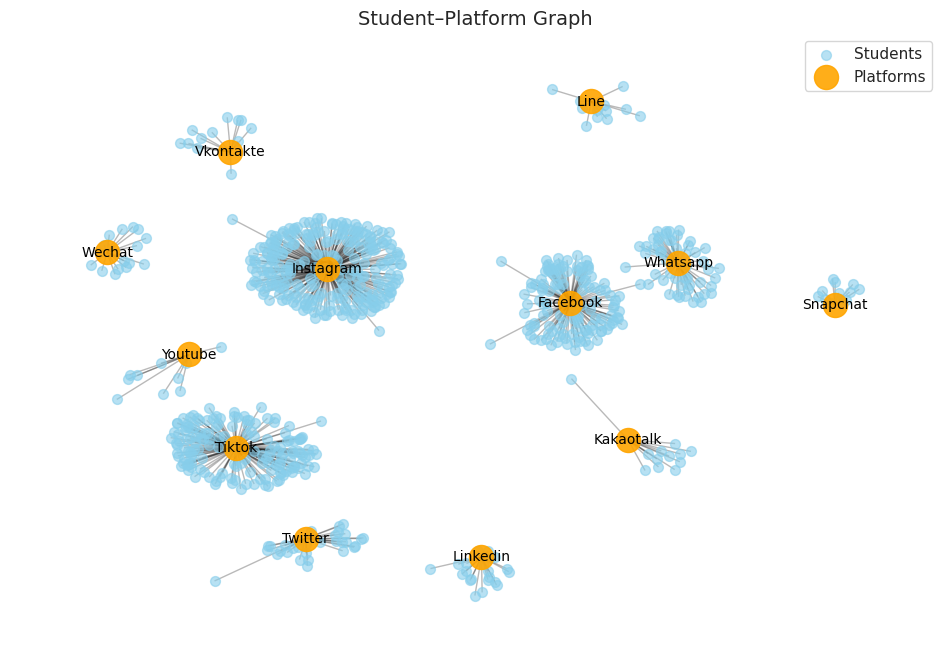

In [ ]:

# Quick visualization
plt.figure(figsize=(12, 8))

# Layout (spring layout = force-directed, natural clustering)
pos = nx.spring_layout(G, k=0.3, seed=42)

# Draw nodes by type
student_nodes = [n for n, d in G.nodes(data=True) if d["type"] == "student"]
platform_nodes = [n for n, d in G.nodes(data=True) if d["type"] == "platform"]

nx.draw_networkx_nodes(G, pos, nodelist=student_nodes,
                       node_size=50, node_color="skyblue", alpha=0.6, label="Students")
nx.draw_networkx_nodes(G, pos, nodelist=platform_nodes,
                       node_size=300, node_color="orange", alpha=0.9, label="Platforms")

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Add labels only for platforms (to reduce clutter)
nx.draw_networkx_labels(G, pos, labels={n: n for n in platform_nodes}, font_size=10, font_color="black")

plt.title("Student–Platform Graph", fontsize=14)
plt.legend(scatterpoints=1)
plt.axis("off")
plt.show()


## Country -> Platform

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite

# Build bipartite graph: Country ↔ Platform
G = nx.Graph()
for _, row in df_clean_pd.iterrows():
    country = f"Country={row['Country']}"
    platform = row['Most_Used_Platform']

    # Add nodes
    G.add_node(country, type="country")
    G.add_node(platform, type="platform")

    # Add edge
    G.add_edge(country, platform)

print(f"Graph built: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# PageRank
pagerank_scores = nx.pagerank(G)
top10_pr = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 nodes by PageRank:")
for node, score in top10_pr:
    print(f"{node}: {score:.4f}")

# Project onto countries
countries = [n for n, d in G.nodes(data=True) if d["type"] == "country"]
country_graph = bipartite.projected_graph(G, countries)

# Triangle Counting
triangles = nx.triangles(country_graph)
top10_tri = sorted(triangles.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 countries by triangle count (dense shared-platform clusters):")
for node, tri in top10_tri:
    print(f"{node}: {tri}")


Graph built: 122 nodes, 171 edges

Top 10 nodes by PageRank:
Instagram: 0.1142
Tiktok: 0.1017
Facebook: 0.0701
Linkedin: 0.0656
Snapchat: 0.0416
Youtube: 0.0296
Twitter: 0.0185
Country=Italy: 0.0124
Country=UK: 0.0123
Country=India: 0.0119

Top 10 countries by triangle count (dense shared-platform clusters):
Country=Italy: 1920
Country=Switzerland: 1920
Country=UK: 1763
Country=India: 1736
Country=Mexico: 1736
Country=Bangladesh: 1730
Country=Canada: 1730
Country=Spain: 1730
Country=Finland: 1730
Country=Poland: 1730


In [ ]:
# Get platforms connected to Italy & Switzerland
italy_platforms = {nbr for nbr in G.neighbors("Country=Italy") if G.nodes[nbr]["type"] == "platform"}
swiss_platforms = {nbr for nbr in G.neighbors("Country=Switzerland") if G.nodes[nbr]["type"] == "platform"}

print("Platforms used in Italy:", italy_platforms)
print("Platforms used in Switzerland:", swiss_platforms)

# Overlap between Italy and Switzerland
shared_platforms = italy_platforms & swiss_platforms
print("\nShared platforms between Italy & Switzerland:", shared_platforms)

# Check how many countries connect to each shared platform
for platform in shared_platforms:
    connected_countries = [nbr for nbr in G.neighbors(platform) if G.nodes[nbr]["type"] == "country"]
    print(f"{platform}: {len(connected_countries)} countries connected → {connected_countries[:10]}...")

Platforms used in Italy: {'Facebook', 'Linkedin', 'Twitter', 'Tiktok', 'Instagram'}
Platforms used in Switzerland: {'Facebook', 'Linkedin', 'Tiktok', 'Instagram'}

Shared platforms between Italy & Switzerland: {'Facebook', 'Linkedin', 'Instagram', 'Tiktok'}
Facebook: 28 countries connected → ['Country=Canada', 'Country=Denmark', 'Country=Greece', 'Country=Vietnam', 'Country=Israel', 'Country=Kenya', 'Country=Venezuela', 'Country=Panama', 'Country=Poland', 'Country=Lithuania']...
Linkedin: 21 countries connected → ['Country=Germany', 'Country=Italy', 'Country=Sweden', 'Country=Switzerland', 'Country=Malaysia', 'Country=Taiwan', 'Country=South Africa', 'Country=Chile', 'Country=Bolivia', 'Country=Bahamas']...
Instagram: 44 countries connected → ['Country=Bangladesh', 'Country=Australia', 'Country=South Korea', 'Country=Mexico', 'Country=Norway', 'Country=Austria', 'Country=Ireland', 'Country=Thailand', 'Country=Hong Kong', 'Country=UAE']...
Tiktok: 39 countries connected → ['Country=USA'


## 6) Spatiotemporal Analysis

Utilize a library like Apache Sedona or similar to handle spatial data within Spark. Implement the following operations:

Convex Hull: Find the smallest convex polygon enclosing a set of points. Buffer: Create a region around a set of points or polygons. Intersections & Unions: Combine or overlap spatial features. Formulate a meaningful question that can be answered using spatiotemporal analysis and demonstrate how these operations help answer it.

In [ ]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [ ]:
!lscpu | grep -E '^Model name|^Thread|^Core|^Socket|^CPU\('

CPU(s):                               2
Model name:                           Intel(R) Xeon(R) CPU @ 2.20GHz
Thread(s) per core:                   2
Core(s) per socket:                   1
Socket(s):                            1


In [ ]:
!free -m -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       913Mi       8.9Gi       2.0Mi       2.9Gi        11Gi
Swap:             0B          0B          0B


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   40G  187G  18% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  775M  61% /usr/sbin/docker-init
/dev/sda1       233G   40G  193G  18% /kaggle/input
tmpfs           6.4G  336K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!lsblk -d -o name,rota

NAME  ROTA
loop0    0
sda      0


In [ ]:
!pip install apache-sedona

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.1/207.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

In [ ]:
! java -version

openjdk version "11.0.28" 2025-07-15
OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)


In [ ]:
!pip -q install pyspark
!pip -q install findspark

In [ ]:
!pip -q install geopandas attrs shapely rtree apache-sedona[spark]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.6/507.6 kB 6.8 MB/s eta 0:00:00


In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.5.2/spark-3.5.2-bin-hadoop3.tgz

In [ ]:
!tar xf spark-3.5.2-bin-hadoop3.tgz

In [ ]:
!export SPARK_HOME=/content/spark-3.5.2-bin-hadoop3
!export PATH=$PATH:/content/spark-3.5.2-bin-hadoop3/bin

In [ ]:
# We set the enviromental variables for Java and Spark.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.2-bin-hadoop3"

In [ ]:
!pip install -q pyspark==3.5.2
!pip install -q findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!echo $SPARK_HOME

/content/spark-3.5.2-bin-hadoop3


In [ ]:
 import pyspark

In [ ]:
!echo $JAVA_HOME

/usr/lib/jvm/java-11-openjdk-amd64


In [ ]:
import findspark
findspark.init()
import shapely
import pandas as pd
import geopandas as gpd
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SparkConf
from sedona.register import SedonaRegistrator
from sedona.utils import SedonaKryoRegistrator, KryoSerializer


In [ ]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder
    .appName("SedonaOps")
    # IMPORTANT: disable Hive so Spark doesn't look for spark-hive JARs
    .config("spark.sql.catalogImplementation", "in-memory")
    # Load Sedona + Geotools that match Spark 3.5.x
    .config(
        "spark.jars.packages",
        "org.apache.sedona:sedona-spark-shaded-3.5_2.12:1.7.2,"
        "org.datasyslab:geotools-wrapper:1.7.2-28.5"
    )
    # Enable Sedona SQL functions
    .config("spark.sql.extensions", "org.apache.sedona.sql.SedonaSqlExtensions")
    # Kryo serializer recommended
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer")
    .config("spark.kryo.registrator", "org.apache.sedona.core.serde.SedonaKryoRegistrator")
    .getOrCreate()
)

print("Spark version:", spark.version)


Spark version: 3.5.2


In [ ]:
spark = SparkSession. \
  builder. \
  appName('GeoBigData'). \
  config("spark.serializer", KryoSerializer.getName). \
  config("spark.executor.memory", "5g"). \
  config("spark.driver.memory", "10g"). \
  config('spark.driver.maxResultSize', '5g'). \
  config("spark.kryo.registrator", SedonaKryoRegistrator.getName). \
  config('spark.jars.packages',
           'org.apache.sedona:sedona-spark-shaded-3.5_2.12:1.6.1,' \
            'org.apache.sedona:sedona-python-adapter-3.0_2.12:1.2.0-incubating,'
           'uk.co.gresearch.spark:spark-extension_2.12:2.11.0-3.4,' \
           'org.datasyslab:geotools-wrapper:1.4.0-28.2'). \
  config("spark.serializer", KryoSerializer.getName). \
  config("spark.kryo.registrator", SedonaKryoRegistrator.getName). \
getOrCreate()

SedonaRegistrator.registerAll(spark)

/tmp/ipython-input-2106023381.py:18: DeprecationWarning: Call to deprecated function registerAll (Deprecated since 1.4.1, use SedonaContext.create() instead.).
  SedonaRegistrator.registerAll(spark)


True

In [ ]:
country_coords = {
    "afghanistan": (33.9391, 67.7100),
    "albania": (41.1533, 20.1683),
    "andorra": (42.5462, 1.6016),
    "argentina": (-38.4161, -63.6167),
    "armenia": (40.0691, 45.0382),
    "australia": (-25.2744, 133.7751),
    "austria": (47.5162, 14.5501),
    "azerbaijan": (40.1431, 47.5769),
    "bahamas": (25.0343, -77.3963),
    "bahrain": (26.0667, 50.5577),
    "bangladesh": (23.6850, 90.3563),
    "belarus": (53.7098, 27.9534),
    "belgium": (50.5039, 4.4699),
    "bhutan": (27.5142, 90.4336),
    "bolivia": (-16.2902, -63.5887),
    "bosnia": (43.9159, 17.6791),
    "brazil": (-14.2350, -51.9253),
    "bulgaria": (42.7339, 25.4858),
    "canada": (56.1304, -106.3468),
    "chile": (-35.6751, -71.5430),
    "china": (35.8617, 104.1954),
    "colombia": (4.5709, -74.2973),
    "costa rica": (9.7489, -83.7534),
    "croatia": (45.1000, 15.2000),
    "cyprus": (35.1264, 33.4299),
    "czech republic": (49.8175, 15.4730),
    "denmark": (56.2639, 9.5018),
    "ecuador": (-1.8312, -78.1834),
    "egypt": (26.8206, 30.8025),
    "estonia": (58.5953, 25.0136),
    "finland": (61.9241, 25.7482),
    "france": (46.2276, 2.2137),
    "georgia": (42.3154, 43.3569),
    "germany": (51.1657, 10.4515),
    "ghana": (7.9465, -1.0232),
    "greece": (39.0742, 21.8243),
    "hong kong": (22.3193, 114.1694),
    "hungary": (47.1625, 19.5033),
    "iceland": (64.9631, -19.0208),
    "india": (20.5937, 78.9629),
    "indonesia": (-0.7893, 113.9213),
    "iraq": (33.2232, 43.6793),
    "ireland": (53.4129, -8.2439),
    "israel": (31.0461, 34.8516),
    "italy": (41.8719, 12.5674),
    "jamaica": (18.1096, -77.2975),
    "japan": (36.2048, 138.2529),
    "jordan": (30.5852, 36.2384),
    "kazakhstan": (48.0196, 66.9237),
    "kenya": (-0.0236, 37.9062),
    "kosovo": (42.6026, 20.9020),
    "kuwait": (29.3117, 47.4818),
    "kyrgyzstan": (41.2044, 74.7661),
    "latvia": (56.8796, 24.6032),
    "lebanon": (33.8547, 35.8623),
    "liechtenstein": (47.1660, 9.5554),
    "lithuania": (55.1694, 23.8813),
    "luxembourg": (49.8153, 6.1296),
    "malaysia": (4.2105, 101.9758),
    "maldives": (3.2028, 73.2207),
    "malta": (35.9375, 14.3754),
    "mexico": (23.6345, -102.5528),
    "moldova": (47.4116, 28.3699),
    "monaco": (43.7384, 7.4246),
    "montenegro": (42.7087, 19.3744),
    "morocco": (31.7917, -7.0926),
    "nepal": (28.3949, 84.1240),
    "netherlands": (52.1326, 5.2913),
    "new zealand": (-40.9006, 174.8860),
    "nigeria": (9.0820, 8.6753),
    "north macedonia": (41.6086, 21.7453),
    "norway": (60.4720, 8.4689),
    "oman": (21.5126, 55.9233),
    "pakistan": (30.3753, 69.3451),
    "panama": (8.5380, -80.7821),
    "paraguay": (-23.4425, -58.4438),
    "peru": (-9.1899, -75.0152),
    "philippines": (12.8797, 121.7740),
    "poland": (51.9194, 19.1451),
    "portugal": (39.3999, -8.2245),
    "qatar": (25.276987, 51.520008),
    "romania": (45.9432, 24.9668),
    "russia": (61.5240, 105.3188),
    "san marino": (43.9333, 12.4500),
    "serbia": (44.0165, 21.0059),
    "singapore": (1.3521, 103.8198),
    "slovakia": (48.6690, 19.6990),
    "slovenia": (46.1512, 14.9955),
    "south africa": (-30.5595, 22.9375),
    "south korea": (35.9078, 127.7669),
    "spain": (40.4637, -3.7492),
    "sri lanka": (7.8731, 80.7718),
    "sweden": (60.1282, 18.6435),
    "switzerland": (46.8182, 8.2275),
    "syria": (34.8021, 38.9968),
    "taiwan": (23.6978, 120.9605),
    "tajikistan": (38.8610, 71.2761),
    "thailand": (15.8700, 100.9925),
    "trinidad": (10.6918, -61.2225),
    "turkey": (38.9637, 35.2433),
    "uae": (23.4241, 53.8478),
    "uk": (55.3781, -3.4360),
    "ukraine": (48.3794, 31.1656),
    "uruguay": (-32.5228, -55.7658),
    "usa": (37.0902, -95.7129),
    "uzbekistan": (41.3775, 64.5853),
    "vatican city": (41.9029, 12.4534),
    "venezuela": (6.4238, -66.5897),
    "vietnam": (14.0583, 108.2772),
    "yemen": (15.5527, 48.5164)
}

coords_df = pd.DataFrame(country_coords.items(), columns=["country_key","coords"])
coords_df[["lat","lon"]] = pd.DataFrame(coords_df["coords"].tolist(), index=coords_df.index)
coords_spark = spark.createDataFrame(coords_df.drop(columns="coords"))

# Join with student data
df_geo = (df_clean.withColumn("country_key", F.lower(F.trim(F.col("Country"))))
            .join(coords_spark, on="country_key", how="left")
            .na.drop(subset=["lat","lon"])
            .select("Student_ID","Country","Most_Used_Platform","Addicted_Score","lat","lon")
)

pdf = df_geo.toPandas()

#df_geo.show()

### Build point geometry (lon,lat in WGS84)

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.functions import expr

HIGH_SCORE = 8.0
BUFFER_M   = 50_000.0  # 50 km

# Build point geometry (lon,lat in WGS84)
students_geo = (
    df_geo
    .withColumn("lat_d", F.col("lat").cast("double"))
    .withColumn("lon_d", F.col("lon").cast("double"))
    .withColumn(
        "geom_wgs84",
        expr("ST_Point(CAST(lon_d AS DECIMAL(24,20)), CAST(lat_d AS DECIMAL(24,20)))")
    )
)
students_geo.createOrReplaceTempView("students_geo")

students_geo.show()

+----------+-----------+------------------+--------------+--------+--------+--------+--------+--------------------+
|Student_ID|    Country|Most_Used_Platform|Addicted_Score|     lat|     lon|   lat_d|   lon_d|          geom_wgs84|
+----------+-----------+------------------+--------------+--------+--------+--------+--------+--------------------+
|       105|Afghanistan|          Linkedin|             5| 33.9391|   67.71| 33.9391|   67.71|POINT (67.71 33.9...|
|        92|    Albania|            Tiktok|             7| 41.1533| 20.1683| 41.1533| 20.1683|POINT (20.1683 41...|
|        87|    Andorra|            Tiktok|             8| 42.5462|  1.6016| 42.5462|  1.6016|POINT (1.6016 42....|
|        45|  Argentina|            Tiktok|             8|-38.4161|-63.6167|-38.4161|-63.6167|POINT (-63.6167 -...|
|        80|    Armenia|         Instagram|             9| 40.0691| 45.0382| 40.0691| 45.0382|POINT (45.0382 40...|
|       319|  Australia|         Instagram|             5|-25.2744|133.7

### Project to meters



In [ ]:
spark.sql("""
  CREATE OR REPLACE TEMP VIEW students_m AS
  SELECT
    Student_ID, Country, Most_Used_Platform, Addicted_Score,
    ST_Transform(geom_wgs84,'epsg:4326','epsg:3857') AS geom_m
  FROM students_geo
""")

DataFrame[]

### Validate + 50 km buffers

In [ ]:
# Validate
spark.sql("""
  CREATE OR REPLACE TEMP VIEW students_valid AS
  SELECT * FROM students_m
  WHERE geom_m IS NOT NULL AND ST_IsValid(geom_m)
""")

DataFrame[]

### 50 km buffers

In [ ]:
spark.sql(f"""
  CREATE OR REPLACE TEMP VIEW buffers_m AS
  SELECT
    Student_ID, Country, Most_Used_Platform, Addicted_Score,
    ST_Buffer(geom_m, {BUFFER_M}) AS buf_m
  FROM students_valid
""")

DataFrame[]

### Coverage via UNIONS

In [ ]:
spark.sql("""
  CREATE OR REPLACE TEMP VIEW global_union AS
  SELECT ST_Union_Aggr(buf_m) AS geom_m FROM buffers_m
""")

spark.sql(f"""
  CREATE OR REPLACE TEMP VIEW high_union AS
  SELECT ST_Union_Aggr(buf_m) AS geom_m
  FROM buffers_m WHERE Addicted_Score >= {HIGH_SCORE}
""")

spark.sql("""
  CREATE OR REPLACE TEMP VIEW platform_union AS
  SELECT Most_Used_Platform AS platform, ST_Union_Aggr(buf_m) AS geom_m
  FROM buffers_m
  GROUP BY Most_Used_Platform
""")

DataFrame[]

### Pairwise platform overlaps (intersections)

In [ ]:
spark.sql("""
  CREATE OR REPLACE TEMP VIEW platform_overlap AS
  SELECT a.platform AS platform_a, b.platform AS platform_b,
         ST_Intersection(a.geom_m, b.geom_m) AS overlap_m
  FROM platform_union a
  JOIN platform_union b ON a.platform < b.platform
  WHERE ST_Intersects(a.geom_m, b.geom_m)
""")

DataFrame[]

### Overlap of glabal vs high cohort

In [ ]:
spark.sql("""
  CREATE OR REPLACE TEMP VIEW global_high_overlap AS
  SELECT ST_Intersection(g.geom_m, h.geom_m) AS overlap_m
  FROM global_union g CROSS JOIN high_union h
  WHERE ST_Intersects(g.geom_m, h.geom_m)
""")


DataFrame[]

### Convex hulls

In [ ]:
spark.sql("""
  CREATE OR REPLACE TEMP VIEW global_hull AS
  SELECT ST_ConvexHull(ST_Union_Aggr(geom_m)) AS hull_m
  FROM students_valid
""")

spark.sql(f"""
  CREATE OR REPLACE TEMP VIEW high_hull AS
  SELECT ST_ConvexHull(ST_Union_Aggr(geom_m)) AS hull_m
  FROM students_valid
  WHERE Addicted_Score >= {HIGH_SCORE}
""")

spark.sql("""
  CREATE OR REPLACE TEMP VIEW platform_hull AS
  SELECT Most_Used_Platform AS platform,
         ST_ConvexHull(ST_Union_Aggr(geom_m)) AS hull_m
  FROM students_valid
  GROUP BY Most_Used_Platform
""")

DataFrame[]

### Display

In [ ]:
# Reports
print("COVERAGE AREAS (buffer unions) — EPSG:3857, approximate")
spark.sql("SELECT ROUND(ST_Area(geom_m)/1e6,2) AS global_coverage_km2 FROM global_union").show()
spark.sql("SELECT ROUND(ST_Area(geom_m)/1e6,2) AS high_coverage_km2   FROM high_union").show()
spark.sql("""
  SELECT platform, ROUND(ST_Area(geom_m)/1e6,2) AS coverage_km2
  FROM platform_union
  ORDER BY coverage_km2 DESC
""").show()

print("OVERLAPS (pairwise intersections)")
spark.sql("""
  SELECT platform_a, platform_b, ROUND(ST_Area(overlap_m)/1e6,2) AS overlap_km2
  FROM platform_overlap
  ORDER BY overlap_km2 DESC
  LIMIT 10
""").show()

spark.sql("""
  SELECT ROUND(ST_Area(overlap_m)/1e6,2) AS global_high_overlap_km2
  FROM global_high_overlap
""").show()

print("HULL AREAS (for visualization reference only)")
spark.sql("SELECT ROUND(ST_Area(hull_m)/1e6,2) AS global_hull_km2 FROM global_hull").show()
spark.sql("SELECT ROUND(ST_Area(hull_m)/1e6,2) AS high_hull_km2   FROM high_hull").show()
spark.sql("""
  SELECT platform, ROUND(ST_Area(hull_m)/1e6,2) AS hull_km2
  FROM platform_hull
  ORDER BY hull_km2 DESC
""").show()


COVERAGE AREAS (buffer unions) — EPSG:3857, approximate
+-------------------+
|global_coverage_km2|
+-------------------+
|          851936.34|
+-------------------+

+-----------------+
|high_coverage_km2|
+-----------------+
|        351162.58|
+-----------------+

+---------+------------+
| platform|coverage_km2|
+---------+------------+
|Instagram|   343358.97|
|   Tiktok|    304340.9|
| Facebook|   218501.16|
| Linkedin|   163875.87|
| Snapchat|   101446.97|
|  Youtube|    78036.13|
|  Twitter|     62428.9|
| Whatsapp|    31214.45|
|     Line|     7803.61|
|   Wechat|     7803.61|
|Vkontakte|     7803.61|
|Kakaotalk|     7803.61|
+---------+------------+

OVERLAPS (pairwise intersections)
+----------+----------+-----------+
|platform_a|platform_b|overlap_km2|
+----------+----------+-----------+
| Instagram|    Tiktok|  132661.42|
|  Facebook| Instagram|  117054.19|
|  Facebook|    Tiktok|   93643.35|
| Instagram|   Twitter|   54625.29|
|    Tiktok|   Twitter|   46821.68|
|  Facebo

In [ ]:
!pip install cartopy shapely geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 91.8 MB/s eta 0:00:00


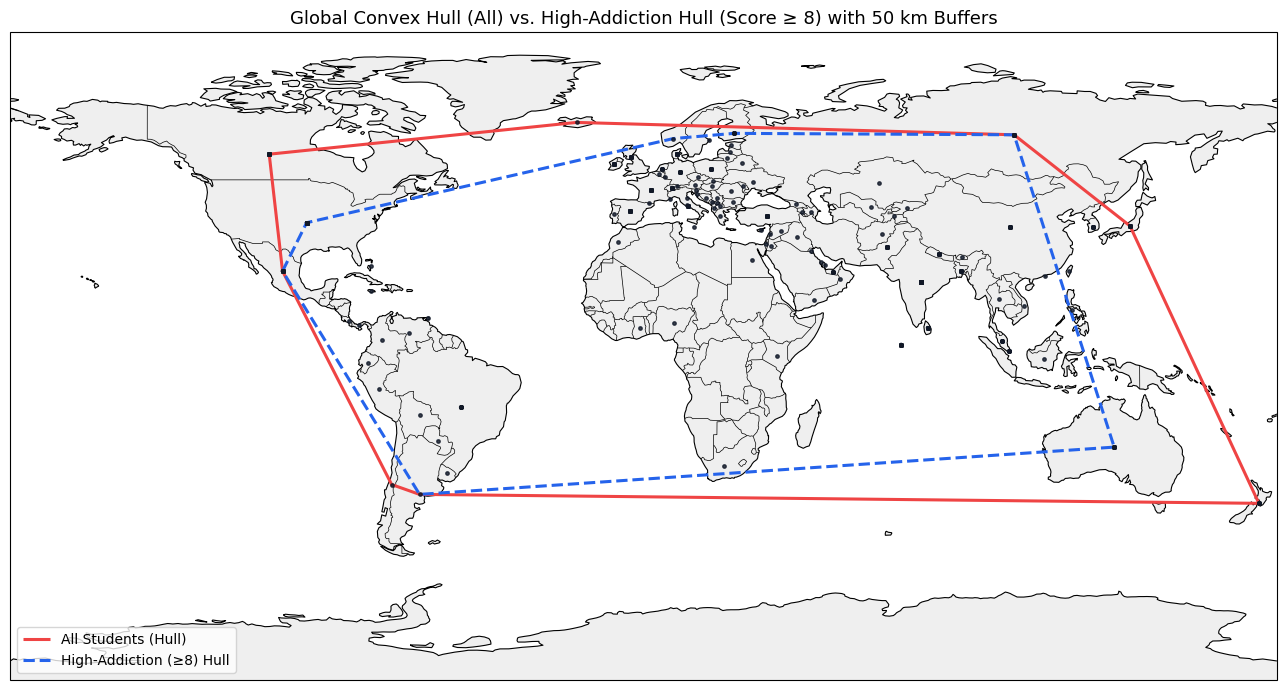

In [ ]:

from shapely import wkt as shapely_wkt
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Hulls (epsg: 3857 -> 4326)
row_all  = spark.sql("""
    SELECT ST_AsText(ST_Transform(hull_m,'epsg:3857','epsg:4326')) AS wkt
    FROM global_hull
""").first()

row_high = spark.sql("""
    SELECT ST_AsText(ST_Transform(hull_m,'epsg:3857','epsg:4326')) AS wkt
    FROM high_hull
""").first()

hull_all  = shapely_wkt.loads(row_all["wkt"])  if row_all  and row_all["wkt"]  else None
hull_high = shapely_wkt.loads(row_high["wkt"]) if row_high and row_high["wkt"] else None

# Buffers
buf_wkts = [
    r["wkt"] for r in spark.sql("""
        SELECT ST_AsText(ST_Transform(buf_m,'epsg:3857','epsg:4326')) AS wkt
        FROM buffers_m
        LIMIT 800
    """).toLocalIterator()
    if r["wkt"] is not None
]
buffers = [shapely_wkt.loads(w) for w in buf_wkts]

# 3) Points
pt_wkts = [
    r["wkt"] for r in spark.sql("""
        SELECT ST_AsText(geom_wgs84) AS wkt
        FROM students_geo
    """).toLocalIterator()
    if r["wkt"] is not None
]
points = [shapely_wkt.loads(w) for w in pt_wkts]

# Wrap in GeoDataFrames (EPSG:4326)
gdfs = {}
if hull_all:
    gdfs["hull_all"]  = gpd.GeoDataFrame(geometry=[hull_all],  crs="EPSG:4326")
if hull_high:
    gdfs["hull_high"] = gpd.GeoDataFrame(geometry=[hull_high], crs="EPSG:4326")

gdf_bufs = gpd.GeoDataFrame(geometry=buffers, crs="EPSG:4326") if buffers else None
gdf_pts  = gpd.GeoDataFrame(geometry=points,  crs="EPSG:4326") if points  else None

#  Plot
fig, ax = plt.subplots(
    figsize=(14, 7),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

ax.set_global()
ax.coastlines(linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor="#efefef", edgecolor="none")
ax.add_feature(cfeature.OCEAN, facecolor="white", edgecolor="none")

# Draw order: buffers -> hulls -> points
if gdf_bufs is not None and len(gdf_bufs) > 0:
    gdf_bufs.plot(
        ax=ax, transform=ccrs.PlateCarree(),
        alpha=0.12, edgecolor="#6b7280", linewidth=0.4, zorder=2
    )

if "hull_all" in gdfs:
    gdfs["hull_all"].boundary.plot(
        ax=ax, transform=ccrs.PlateCarree(),
        color="#ef4444", linewidth=2.2, label="All Students (Hull)", zorder=3
    )

if "hull_high" in gdfs:
    gdfs["hull_high"].boundary.plot(
        ax=ax, transform=ccrs.PlateCarree(),
        color="#2563eb", linewidth=2.2, linestyle="--",
        label="High-Addiction (≥8) Hull", zorder=4
    )

if gdf_pts is not None and len(gdf_pts) > 0:
    gdf_pts.plot(
        ax=ax, transform=ccrs.PlateCarree(),
        markersize=6, color="#111827", alpha=0.8, zorder=5
    )

ax.set_title("Global Convex Hull (All) vs. High-Addiction Hull (Score ≥ 8) with 50 km Buffers", fontsize=13)
ax.legend(loc="lower left", frameon=True)
plt.tight_layout()
plt.show()


**Red solid polygon** = All Students (Global Convex Hull)

Encloses nearly every continent (Americas, Europe, Asia, Oceania).

Demonstrates that dataset covers a broad global footprint.

**Blue dashed polygon** = High-Addiction Students (Convex Hull, Score ≥ 8)

Noticeably smaller and tighter.

Concentrated around North America, Europe, and Asia.

Excludes much of South America, Africa, and some Oceania.

**Black dots** = Student locations

Help explain why the hulls take their shape.

We can see how high-addiction clusters are denser in Europe/Asia.

**Interpretation:**

*Global coverage:* Addiction exists everywhere, reflected by the wide red hull.

*Regional dominance:* High-addiction is geographically concentrated (blue hull).
